## **Bike Sharing Dataset**

**Problem Statement**

Can you predict count (demand of bikes) based on seasonal and environmental changes?

In [ ]:
#import libraries

import os
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from prettytable import PrettyTable

#for model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from scipy import stats

#for cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
#import data

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#check shape and properties of data and check for null values

df.shape
df.info()
df.isnull().sum().sort_values(ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#feature extraction

#extracting date from dteday
df['dteday'] = pd.to_datetime(df['dteday'])
df['date'] = df['dteday'].dt.day
df = df.drop(columns=['dteday', 'instant'])
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30


In [ ]:
#rename titles
df.rename(columns={'weathersit':'weather_condition',
                    'hum':'humidity',
                    'mnth':'month',
                    'cnt':'count',
                    'hr':'hour',
                    'yr':'year',
                    'atemp':'apparent_temp'},inplace=True)


In [ ]:
#convert season, year, month, holiday, weekday, workingday, weather_condition, date to categories

categoryFeatureList = ['season', 'year', 'month', 'holiday', 
                       'weekday', 'workingday', 'weather_condition', 'date']

for var in categoryFeatureList:
  df[var] = df[var].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             731 non-null    category
 1   year               731 non-null    category
 2   month              731 non-null    category
 3   holiday            731 non-null    category
 4   weekday            731 non-null    category
 5   workingday         731 non-null    category
 6   weather_condition  731 non-null    category
 7   temp               731 non-null    float64 
 8   apparent_temp      731 non-null    float64 
 9   humidity           731 non-null    float64 
 10  windspeed          731 non-null    float64 
 11  casual             731 non-null    int64   
 12  registered         731 non-null    int64   
 13  count              731 non-null    int64   
 14  date               731 non-null    category
dtypes: category(8), float64(4), int64(3)
memory usage: 48.6 K

In [ ]:
#Feature selection
df_copy = df
df_copy = df_copy.drop(columns = ['year', 'month', 'casual', 'registered', 'date', 'holiday', 'weekday', 'workingday', 'temp'])


In [ ]:
#defining x and y

x = df_copy.drop(['count', 'season', 'weather_condition'], axis=1)  
y = df_copy['count']

print(x)

     apparent_temp  humidity  windspeed
0         0.363625  0.805833   0.160446
1         0.353739  0.696087   0.248539
2         0.189405  0.437273   0.248309
3         0.212122  0.590435   0.160296
4         0.229270  0.436957   0.186900
..             ...       ...        ...
726       0.226642  0.652917   0.350133
727       0.255046  0.590000   0.155471
728       0.242400  0.752917   0.124383
729       0.231700  0.483333   0.350754
730       0.223487  0.577500   0.154846

[731 rows x 3 columns]


In [ ]:
#splitting dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 10)
print(x_train)

     apparent_temp  humidity  windspeed
72        0.332000  0.496957   0.136926
510       0.627529  0.747083   0.140550
701       0.359208  0.823333   0.124379
264       0.554963  0.902083   0.128125
577       0.662896  0.704167   0.165425
..             ...       ...        ...
369       0.278412  0.524167   0.129987
320       0.323221  0.575833   0.305362
527       0.659721  0.587917   0.207713
125       0.474117  0.590000   0.228246
265       0.522125  0.972500   0.078367

[511 rows x 3 columns]


Mean Squared Error:  2029118.6964330873
R score:  0.4624394942060247
Mean Absolute Error:  1126.202279975699


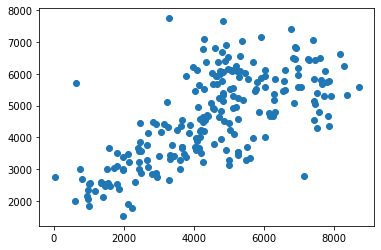

In [ ]:
#Multiple Linear Regression
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)

mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)


print("Mean Squared Error: ", mse)
print("R score: ", r)
print("Mean Absolute Error: ", mae)

x1 = min(y_test)
x2 = max(y_test)
y1 = min(y_predicted)
y2 = max(y_predicted)

plt.scatter(y_test, y_predicted)
plt.show()

In [ ]:
#Polynomial Regression
polynomial_features = PolynomialFeatures(degree=4)

x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly, y_train)

y_predicted_poly = model.predict(x_poly_test)

poly_mse= mean_squared_error(y_test, y_predicted_poly)
poly_r = r2_score(y_test, y_predicted_poly)
poly_mae = mean_absolute_error(y_test, y_predicted_poly)

print("Mean Squared Error: ", poly_mse)
print("R score: ", poly_r)
print("Mean Absolute Error: ", poly_mae)



Mean Squared Error:  11189979.286363637
R score:  -1.9644845003773312
Mean Absolute Error:  1637.2863636363636


In [ ]:
#display all algorithms in a pretty table

table = PrettyTable()

table.field_names = ["Model", "Mean Squared Error", "R_2 Score", "Mean Absolute Error", "AIC", "BIC"]

models = [
          LinearRegression(),
          SVR(kernel='rbf'),
          SVR(kernel='linear'),
          SVR(kernel='poly'),
          Lasso(alpha=0.1),
]

for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  mse = mean_squared_error(y_test, y_res)
  score = r2_score(y_test, y_res)
  mae = mean_absolute_error(y_test, y_res)
  
  table.add_row([type(model).__name__, format(mse, '.2f'),
                 format(score, '.2f'), format(mae, '.2f'),
                 format(aic, '.2f'), format(bic, '.2f')])
  

table.add_row(["Polynomial Regression", format(poly_mse, '.2f'),
               format(poly_r, '.2f'), format(poly_mae, '.2f'),
               format(aic, '.2f'), format(bic, '.2f')])
  
print(table)

+-----------------------+--------------------+-----------+---------------------+----------+----------+
|         Model         | Mean Squared Error | R_2 Score | Mean Absolute Error |   AIC    |   BIC    |
+-----------------------+--------------------+-----------+---------------------+----------+----------+
|    LinearRegression   |     2029118.70     |    0.46   |       1126.20       | 11018.36 | 11027.55 |
|          SVR          |     3658990.44     |    0.03   |       1533.92       | 11018.36 | 11027.55 |
|          SVR          |     3756775.39     |    0.00   |       1556.96       | 11018.36 | 11027.55 |
|          SVR          |     2343715.93     |    0.38   |       1210.08       | 11018.36 | 11027.55 |
|         Lasso         |     2029081.75     |    0.46   |       1126.25       | 11018.36 | 11027.55 |
| Polynomial Regression |    11189979.29     |   -1.96   |       1637.29       | 11018.36 | 11027.55 |
+-----------------------+--------------------+-----------+---------------

In [ ]:
#Cross validation
#display all algorithms in a pretty table

table = PrettyTable()
print("After Cross Validation:")

table.field_names = ["Model", "Mean Squared Error", "R_2 Score", "Mean Absolute Error"]

models = [
          LinearRegression(),
          SVR(kernel='rbf'),
          SVR(kernel='linear'),
          SVR(kernel='poly'),
          Lasso(alpha=0.1),
]

for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  
  reg_mse = cross_val_score(estimator=model, X=x, y=y, scoring='neg_mean_squared_error', cv=2)
  score_mse = reg_mse.mean() * -1

  reg_mae = cross_val_score(estimator=model, X=x, y=y, scoring='neg_mean_absolute_error', cv=2)
  score_mae = reg_mae.mean() * -1

  reg_r2 = cross_val_score(estimator=model, X=x, y=y, scoring='r2', cv=2)
  score_r2 = reg_r2.mean()
  
  table.add_row([type(model).__name__, format(mse, '.2f'),
                 format(score, '.2f'), format(mae, '.2f'),])
  

table.add_row(["Polynomial Regression", format(poly_mse, '.2f'),
               format(poly_r, '.2f'), format(poly_mae, '.2f')])
  
print(table)

After Cross Validation:
+-----------------------+--------------------+-----------+---------------------+
|         Model         | Mean Squared Error | R_2 Score | Mean Absolute Error |
+-----------------------+--------------------+-----------+---------------------+
|    LinearRegression   |     2029081.75     |    0.46   |       1126.25       |
|          SVR          |     2029081.75     |    0.46   |       1126.25       |
|          SVR          |     2029081.75     |    0.46   |       1126.25       |
|          SVR          |     2029081.75     |    0.46   |       1126.25       |
|         Lasso         |     2029081.75     |    0.46   |       1126.25       |
| Polynomial Regression |    11189979.29     |   -1.96   |       1637.29       |
+-----------------------+--------------------+-----------+---------------------+


In [ ]:
df.corr()

,temp,apparent_temp,humidity,windspeed,casual,registered,count
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
apparent_temp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [ ]:
x = df_copy.drop(['count', 'season', 'weather_condition', 'humidity', 'windspeed'], axis=1)
print(x)


     apparent_temp
0         0.363625
1         0.353739
2         0.189405
3         0.212122
4         0.229270
..             ...
726       0.226642
727       0.255046
728       0.242400
729       0.231700
730       0.223487

[731 rows x 1 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 10)

Mean Squared Error:  2240685.7683478543
R score:  0.4063904802238588
Mean Absolute Error:  1177.882345734005


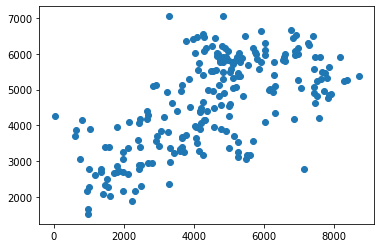

Number of parameters: 2
AIC: 10692.896
BIC: 10702.085


In [ ]:
from math import log
#Linear Regression

def calculate_aic(n, mse, num_param):
  aic = n * log(mse) + 2 * num_param
  return aic 

def calculate_bic(n, mse, num_param):
  bic = n * log(mse) + num_param * log(n)
  return bic 

linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)

mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print("Mean Squared Error: ", mse)
print("R score: ", r)
print("Mean Absolute Error: ", mae)


plt.scatter(y_test, y_predicted)
plt.show()

num_param = len(linearRegressor.coef_)+1
print('Number of parameters: %d' % (num_param))

aic = calculate_aic(len(y), mse, num_param)
print('AIC: %.3f' % aic)

bic = calculate_bic(len(y), mse, num_param)
print('BIC: %.3f' %bic)


In [ ]:
#Polynomial Regression
polynomial_features = PolynomialFeatures(degree=4)

x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly, y_train)

y_predicted_poly = model.predict(x_poly_test)

poly_mse= mean_squared_error(y_test, y_predicted_poly)
poly_r = r2_score(y_test, y_predicted_poly)
poly_mae = mean_absolute_error(y_test, y_predicted_poly)

print("Mean Squared Error: ", poly_mse)
print("R score: ", poly_r)
print("Mean Absolute Error: ", poly_mae)


Mean Squared Error:  2049384.4021801038
R score:  0.4570706397123038
Mean Absolute Error:  1136.2535308360916


In [ ]:
table = PrettyTable()

table.field_names = ["Model", "Mean Squared Error", "R_2 Score", "Mean Absolute Error", "AIC",
                     "BIC"]

models = [
          LinearRegression(),
          SVR(kernel='rbf'),
          SVR(kernel='linear'),
          SVR(kernel='poly'),
          Lasso(alpha=0.1),
]

for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  mse = mean_squared_error(y_test, y_res)
  score = r2_score(y_test, y_res)
  mae = mean_absolute_error(y_test, y_res)
  aic = calculate_aic(len(y), mse, num_param)
  bic = calculate_bic(len(y), mse, num_param)
  
  table.add_row([type(model).__name__, format(mse, '.2f'),
                 format(score, '.2f'), format(mae, '.2f'),
                 format(aic, '.2f'), format(bic, '.2f')])
  
print(table)

+------------------+--------------------+-----------+---------------------+----------+----------+
|      Model       | Mean Squared Error | R_2 Score | Mean Absolute Error |   AIC    |   BIC    |
+------------------+--------------------+-----------+---------------------+----------+----------+
| LinearRegression |     2240685.77     |    0.41   |       1177.88       | 10692.90 | 10702.08 |
|       SVR        |     3581223.38     |    0.05   |       1514.03       | 11035.68 | 11044.87 |
|       SVR        |     3757758.70     |    0.00   |       1557.22       | 11070.85 | 11080.04 |
|       SVR        |     2652427.60     |    0.30   |       1291.85       | 10816.21 | 10825.40 |
|      Lasso       |     2240601.36     |    0.41   |       1177.87       | 10692.87 | 10702.06 |
+------------------+--------------------+-----------+---------------------+----------+----------+


In [ ]:
df_copy

,season,weather_condition,apparent_temp,humidity,windspeed,count
0,1,2,0.363625,0.805833,0.160446,985
1,1,2,0.353739,0.696087,0.248539,801
2,1,1,0.189405,0.437273,0.248309,1349
3,1,1,0.212122,0.590435,0.160296,1562
4,1,1,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...
726,1,2,0.226642,0.652917,0.350133,2114
727,1,2,0.255046,0.590000,0.155471,3095
728,1,2,0.242400,0.752917,0.124383,1341
729,1,1,0.231700,0.483333,0.350754,1796


In [ ]:
x = df_copy.drop(['count', 'season', 'weather_condition', 'apparent_temp', 'windspeed'], axis=1)
print(x)

     humidity
0    0.805833
1    0.696087
2    0.437273
3    0.590435
4    0.436957
..        ...
726  0.652917
727  0.590000
728  0.752917
729  0.483333
730  0.577500

[731 rows x 1 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 10)

Mean Squared Error:  3757852.715232217
R score:  0.004457841795797335
Mean Absolute Error:  1544.1296315710122


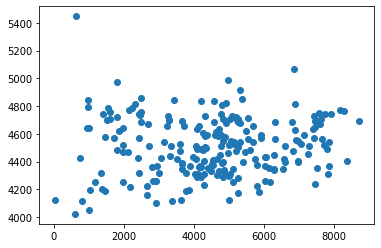

Number of parameters: 2
AIC: 11070.871
BIC: 11080.060


In [ ]:
#Linear Regression

def calculate_aic(n, mse, num_param):
  aic = n * log(mse) + 2 * num_param
  return aic 

def calculate_bic(n, mse, num_param):
  bic = n * log(mse) + num_param * log(n)
  return bic 

linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)

mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print("Mean Squared Error: ", mse)
print("R score: ", r)
print("Mean Absolute Error: ", mae)

plt.scatter(y_test, y_predicted)
plt.show()


num_param = len(linearRegressor.coef_)+1
print('Number of parameters: %d' % (num_param))

aic = calculate_aic(len(y), mse, num_param)
print('AIC: %.3f' % aic)

bic = calculate_bic(len(y), mse, num_param)
print('BIC: %.3f' %bic)


In [ ]:
table = PrettyTable()

table.field_names = ["Model", "Mean Squared Error", "R_2 Score", "Mean Absolute Error", "AIC",
                     "BIC"]

models = [
          LinearRegression(),
          SVR(kernel='rbf'),
          SVR(kernel='linear'),
          SVR(kernel='poly'),
          Lasso(alpha=0.1)
]

for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  mse = mean_squared_error(y_test, y_res)
  score = r2_score(y_test, y_res)
  mae = mean_absolute_error(y_test, y_res)
  aic = calculate_aic(len(y), mse, num_param)
  bic = calculate_bic(len(y), mse, num_param)
  
  table.add_row([type(model).__name__, format(mse, '.2f'),
                 format(score, '.2f'), format(mae, '.2f'),
                 format(aic, '.2f'), format(bic, '.2f')])
  

print(table)

+------------------+--------------------+-----------+---------------------+----------+----------+
|      Model       | Mean Squared Error | R_2 Score | Mean Absolute Error |   AIC    |   BIC    |
+------------------+--------------------+-----------+---------------------+----------+----------+
| LinearRegression |     3757852.72     |    0.00   |       1544.13       | 11070.87 | 11080.06 |
|       SVR        |     3758187.87     |    0.00   |       1557.00       | 11070.94 | 11080.12 |
|       SVR        |     3775069.74     |   -0.00   |       1561.19       | 11074.21 | 11083.40 |
|       SVR        |     3677224.53     |    0.03   |       1523.40       | 11055.02 | 11064.20 |
|      Lasso       |     3757764.75     |    0.00   |       1544.15       | 11070.85 | 11080.04 |
+------------------+--------------------+-----------+---------------------+----------+----------+


In [ ]:
x = df_copy.drop(['count', 'season', 'weather_condition', 'apparent_temp', 'humidity'], axis=1)
print(x)

     windspeed
0     0.160446
1     0.248539
2     0.248309
3     0.160296
4     0.186900
..         ...
726   0.350133
727   0.155471
728   0.124383
729   0.350754
730   0.154846

[731 rows x 1 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    random_state = 10)

Mean Squared Error:  3496968.0906094387
R score:  0.07357221692457472
Mean Absolute Error:  1509.337371748546


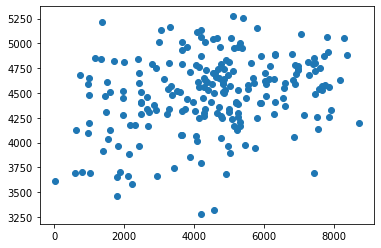

Number of parameters: 2
AIC: 11018.274
BIC: 11027.463


In [ ]:
#Linear Regression

def calculate_aic(n, mse, num_param):
  aic = n * log(mse) + 2 * num_param
  return aic 

def calculate_bic(n, mse, num_param):
  bic = n * log(mse) + num_param * log(n)
  return bic 


linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)

mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print("Mean Squared Error: ", mse)
print("R score: ", r)
print("Mean Absolute Error: ", mae)

plt.scatter(y_test, y_predicted)
plt.show()


num_param = len(linearRegressor.coef_)+1
print('Number of parameters: %d' % (num_param))

aic = calculate_aic(len(y), mse, num_param)
print('AIC: %.3f' % aic)

bic = calculate_bic(len(y), mse, num_param)
print('BIC: %.3f' %bic)


In [ ]:
table = PrettyTable()

table.field_names = ["Model", "Mean Squared Error", "R_2 Score", "Mean Absolute Error", "AIC",
                     "BIC"]

models = [
          LinearRegression(),
          SVR(kernel='rbf'),
          SVR(kernel='linear'),
          SVR(kernel='poly'),
          Lasso(alpha=0.1)
]

for model in models:
  model.fit(x_train, y_train)
  y_res = model.predict(x_test)
  mse = mean_squared_error(y_test, y_res)
  score = r2_score(y_test, y_res)
  mae = mean_absolute_error(y_test, y_res)
  aic = calculate_aic(len(y), mse, num_param)
  bic = calculate_bic(len(y), mse, num_param)
  
  table.add_row([type(model).__name__, format(mse, '.2f'),
                 format(score, '.2f'), format(mae, '.2f'),
                 format(aic, '.2f'), format(bic, '.2f')])
  
print(table)

+------------------+--------------------+-----------+---------------------+----------+----------+
|      Model       | Mean Squared Error | R_2 Score | Mean Absolute Error |   AIC    |   BIC    |
+------------------+--------------------+-----------+---------------------+----------+----------+
| LinearRegression |     3496968.09     |    0.07   |       1509.34       | 11018.27 | 11027.46 |
|       SVR        |     3754036.77     |    0.01   |       1555.56       | 11070.13 | 11079.32 |
|       SVR        |     3774731.85     |   -0.00   |       1561.10       | 11074.15 | 11083.34 |
|       SVR        |     3510910.16     |    0.07   |       1512.93       | 11021.18 | 11030.37 |
|      Lasso       |     3497363.48     |    0.07   |       1509.38       | 11018.36 | 11027.55 |
+------------------+--------------------+-----------+---------------------+----------+----------+
